# Is religion a good thing?


## Preliminaries

As for the other notebooks in this set of assignments, tests in this notebook
do not usually test if you have the right answer, but only if you have the
*right sort* of answer.  *Be careful* -- the tests could pass, but your answer
could still be wrong

In [1]:
# Don't change this cell; just run it.

import numpy as np
import pandas as pd
# Safe settings for Pandas.
pd.set_option('mode.chained_assignment', 'raise')

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from client.api.notebook import Notebook
ok = Notebook('religion.ok')

Assignment: religion
OK, version v1.18.1



## To religion

We [return](https://uob-ds.github.io/cfd2021/wild-pandas/noble_politics) to the data
published in:

> Samuel P. Oliner and Pearl M. Oliner (1992) "The Altruistic Personality:
> Rescuers of Jews in Nazi Europe". Free Press, New York. ISBN 0-02923829-3.

See [the dataset
page](https://github.com/matthew-brett/datasets/tree/master/oliner1988)
for some more details.

As you remember, Samuel and Pearl Oliner had detailed interview data from:

* 231 people who had sheltered Jews during the second world war (the *Rescuer*
  group);
* 53 people, roughly matched with the Rescuers on age, education, and
  nationality, who claimed to have either sheltered Jews, or contributed to the
  resistance, or both (the *Active* group);
* 73 people, roughly matched to the Rescuers as above, who did not claim to
  have sheltered Jews or helped the resistance (the *Bystander* group).

The Oliners' interest was to find characteristics of the Rescuer group that
might be related to their extraordinary choice to risk their lives or
livelihood to shelter Jews.

Here we are studying the data from table 6.6 of their book. The table
cross-tabulates the answers to question D14 from their interview schedule:
"Before the war, were you very religious, somewhat religious, not very
religious or not at all religious?".

You will find
a [version](https://github.com/matthew-brett/datasets/tree/master/oliner1988)
of the data from that table in the file `oliner_tab6_6.csv`.

Read that table as a data frame.

In [3]:
religion = pd.read_csv('oliner_tab6_6.csv')
religion

,level,rescuers,actives,bystanders
0,Very,65,9,17
1,Somewhat,79,17,34
2,Not very,41,18,11
3,Not at all,25,4,10
4,out of,210,48,72


In [ ]:
_ = ok.grade('q_01_religion')

Next clean up the table a bit.  First make a new table that contains all but
the last row (with level "out of") that we do not need.  Next, to make indexing
easier, replace the current table index (that is sequential row numbers) with
the values in the "level" column, to make a new data frame, `top_religion`.

In [6]:
top_religion = religion.iloc[:-1,:].set_index('level')
top_religion

,rescuers,actives,bystanders
level,,,
Very,65,9,17
Somewhat,79,17,34
Not very,41,18,11
Not at all,25,4,10


In [7]:
_ = ok.grade('q_02_top_religion')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



Let us restrict our attention to the Rescuers and the Actives, for the moment.
Make a new table `rescuers_actives` that contains only the first two columns of
`top_religion`:

In [8]:
rescuers_actives = top_religion.iloc[:,:2]
rescuers_actives

,rescuers,actives
level,,
Very,65,9
Somewhat,79,17
Not very,41,18
Not at all,25,4


In [9]:
_ = ok.grade('q_03_rescuers_actives')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



Superficially, it looks as if there is a greater tendency for Rescuers to be
Very or Somewhat religious, than is the case for Actives.

Could this tendency have come about by chance?  How could we address this?

Let us first extend the technique that we used in the [noble politics](https://uob-ds.github.io/cfd2021/wild-pandas/noble_politics) notebook.

We will assume a model world in which we have the same total number of
rescuers as we see here, and the same total number of actives.

We also have the same total numbers of people who are "Very", "Somewhat", "Not very" and "Not at all" religious.

However, in this model world, there is no difference in the tendency of
Rescuers and Actives to give any of the four levels of religiousness.  For
example, in this world, a Rescuer is just as likely as an Active to answer
"Very".

To simulate this world, we could put 65 + 9 = 74 pieces of paper with "Very"
written on them into a hat, along with 79 + 17 = 96 pieces of paper with
"Somewhat" written on them, and so on.  Then we shake up the hat, and, for each
of the 210 Rescuers we draw one piece of paper out of the hat, tabulate the
result (Rescuer associated with "Very", or "Somewhat", etc), and put the piece
of paper aside.  Similarly for the remaining 48 labels, that correspond to the
Actives.  This gives us a new table of counts, where there is a random
association between the group (Rescuer / Active) and Religiousness (Very,
Somewhat, Not very, Not at all).

Here is one trial in such a world:

In [10]:
# Run this cell
# Recreate the individual labels for group and religiousness.
group = np.repeat(['rescuers', 'actives'], rescuers_actives.sum())
religiousness = np.repeat(['Very', 'Somewhat', 'Not very', 'Not at all'],
                         rescuers_actives.transpose().sum())
# Shuffle the religiousness labels to give a random association.
np.random.shuffle(religiousness)
# Make, show fake table.
fake_table = pd.crosstab(religiousness, group)
fake_table

col_0,actives,rescuers
row_0,,
Not at all,4,25
Not very,12,47
Somewhat,22,74
Very,10,64


Let's look in particular at the value for Very and Actives:

In [17]:
# Run this cell
actual_by_very = rescuers_actives.loc['Very', 'actives']
actual_by_very

9

Compare this to the value from the fake table:

In [18]:
# Run this cell
fake_by_very = fake_table.loc['Very', 'actives']
fake_by_very

10

Run this simulation *1000* times, to get 1000 samples of the Very, Actives number.

**Careful**: if you run this simulation 10000 times, instead of 1000, it will
take a long time.

In [19]:
def run_sim():
    # Shuffle the religiousness labels to give a random association.
    np.random.shuffle(religiousness)
    # Make, show fake table.
    fake_table = pd.crosstab(religiousness, group)
    return fake_table

In [22]:
very_actives = np.array([run_sim().loc['Very', 'actives'] for i in range(1000) ])
# Show the first five values
very_actives[:5]

array([15, 12, 13, 13, 14])

In [23]:
_ = ok.grade('q_04_very_actives')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



Use the next cell to plot a histogram of the `very_actives` values, and
calculate the proportion of `very_actives` that are less than or equal to the
value we observed in the original table.  You will need these for later.

Text(0.5, 0, 'simulated value')

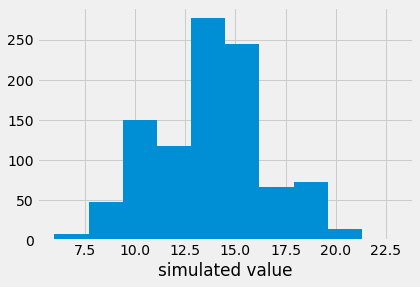

In [56]:
#- Plot a histogram of the very_actives values, calculate the proportion.
import seaborn as sns
plt.hist(very_actives)
plt.xlabel('simulated value')

In [57]:
less_prop = np.count_nonzero(very_actives <= actual_by_very)/len(very_actives)
less_prop

0.056

Now assume that we are interested in the idea that Rescuers tend to be more
religious than Actives, on average.   We need some way of converting the
categories -- Very; Somewhat; Not very; Not at all -- to a score of
religiousness.

Map the categories to numbers like this:

* Very = 3
* Somewhat = 2
* Not very = 1
* Not at all = 0

For example, I can construct the scores for all 210 rescuers represented in the table with:

In [58]:
# Run this cell
rescuer_counts = rescuers_actives.loc[:, 'rescuers']
rescuer_scores = np.repeat([3, 2, 1, 0], rescuer_counts)
rescuer_scores

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

The mean religiousness scores for rescuers is:

In [59]:
np.mean(rescuer_scores)

1.8761904761904762

Follow the same recipe to reconstruct the 48 Actives scores:

In [60]:
active_scores = np.repeat([3, 2, 1, 0], rescuers_actives.loc[:, 'actives'])
active_scores

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0])

In [61]:
_ = ok.grade('q_05_active_scores')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



Now you have the scores, you can do a permutation test.

The observed mean difference in scores is:

In [62]:
# Run this cell
observed = np.mean(rescuer_scores) - np.mean(active_scores)
observed

0.23035714285714293

In [63]:
np.random.permutation(all_scores)

array([3, 1, 2, 2, 1, 2, 2, 2, 3, 1, 3, 3, 3, 2, 1, 3, 2, 2, 2, 1, 2, 1,
       2, 2, 3, 2, 3, 0, 3, 2, 3, 0, 2, 2, 2, 0, 2, 2, 1, 3, 3, 3, 1, 1,
       2, 2, 2, 0, 2, 2, 2, 1, 3, 3, 2, 1, 1, 2, 3, 1, 2, 1, 2, 1, 1, 2,
       2, 0, 2, 2, 2, 1, 1, 2, 3, 3, 3, 3, 1, 2, 2, 0, 2, 3, 3, 0, 1, 1,
       3, 3, 3, 3, 3, 2, 2, 1, 3, 1, 3, 1, 3, 1, 3, 2, 2, 0, 0, 0, 2, 0,
       3, 2, 2, 3, 1, 3, 0, 1, 3, 3, 2, 1, 1, 1, 2, 0, 3, 1, 0, 2, 1, 2,
       2, 3, 3, 0, 1, 2, 2, 3, 2, 3, 3, 2, 3, 3, 2, 1, 2, 0, 3, 3, 1, 2,
       3, 3, 3, 1, 3, 3, 2, 3, 2, 2, 2, 3, 2, 2, 1, 3, 2, 2, 3, 3, 2, 1,
       0, 2, 2, 1, 3, 1, 1, 2, 1, 2, 3, 1, 2, 0, 2, 1, 1, 3, 0, 0, 1, 3,
       2, 1, 1, 0, 1, 0, 2, 3, 3, 3, 1, 2, 2, 0, 2, 0, 2, 2, 3, 2, 0, 3,
       2, 1, 2, 2, 2, 1, 1, 3, 2, 2, 2, 1, 2, 3, 3, 2, 1, 3, 2, 2, 0, 3,
       1, 0, 2, 2, 1, 3, 1, 1, 3, 2, 0, 0, 2, 3, 3, 2])

Now run a simulation of 10000 trials where, for each trial, you:

* mix up the scores for the Rescuers and the actives;
* The number of Rescuers is 210.  Select 210 scores at random to be fake
  Rescuer scores; the remainder are fake Actives scores;
* calculate the difference in means between these two fake groups, and store it
  in an array `fake_mean_diffs`.

In [64]:
n_rep = 10000
fake_mean_diffs = np.zeros(n_rep)
all_scores = np.append(rescuer_scores,active_scores)
for i in range(n_rep):
    permuted = np.random.permutation(all_scores)
    f_rescuers = permuted[:210] ; f_actives = permuted[210:]
    fake_mean_diffs[i] = f_rescuers.mean() - f_actives.mean()
# Show the first five values
fake_mean_diffs[:5]

array([-0.02559524,  0.17916667,  0.17916667,  0.2047619 , -0.07678571])

In [66]:
_ = ok.grade('q_06_fake_mean_diffs')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed



Use the cell below to do a histogram of these values, and calculate the proportion of these fake values that are greater than or equal to the observed value:

(array([2.000e+00, 4.000e+01, 3.620e+02, 1.399e+03, 2.843e+03, 2.999e+03,
        1.703e+03, 5.500e+02, 9.700e+01, 5.000e+00]),
 array([-0.63988095, -0.51446429, -0.38904762, -0.26363095, -0.13821429,
        -0.01279762,  0.11261905,  0.23803571,  0.36345238,  0.48886905,
         0.61428571]),
 <BarContainer object of 10 artists>)

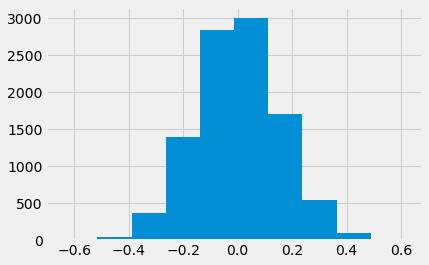

In [67]:
#- Use this cell to plot histogram and calculate proportion.
plt.hist(fake_mean_diffs)

In [72]:
np.count_nonzero(fake_mean_diffs >= observed)/len(fake_mean_diffs)


0.0871

With the evidence you have here, what conclusion can you draw about the
observed counts of self-ratings of religiousness, from `oliner_tab6_6.csv`?  Do
you think the counts are compatible with random sampling, in a world where
there is no association between being a rescuer or an active and the person's
level of religiousness?  Justify your conclusion.


*Write your answer here, replacing this text.*

## Done

You're finished with the assignment!  Be sure to...

- **run all the tests** (the next cell has a shortcut for that),
- **Save and Checkpoint** from the "File" menu.
- Finally, **restart** the kernel for this notebook, and **run all the cells**,
  to check that the notebook still works without errors.  Use the
  "Kernel" menu, and choose "Restart and run all".  If you find any
  problems, go back and fix them, save the notebook, and restart / run
  all again, before submitting.  When you do this, you make sure that
  we, your humble markers, will be able to mark your notebook.

In [71]:
# For your convenience, you can run this cell to run all the tests at once!
import os
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 4
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------

InvalidTestInQuestionListException: Test "q_03_rescuers_actives-checkpoint" not found
Did you mean one of the following? (Names are case sensitive)
    q_01_religion
    q_02_top_religion
    q_03_rescuers_actives
    q_04_very_actives
    q_05_active_scores
    q_06_fake_mean_diffs

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=40b11abf-da96-40a9-bda2-9991ea01f205' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>